In [90]:
import wordcloud # pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [242]:
autovec = []

with open("../analysis/potencia", 'r') as pot:
    for line in pot:
        if line.find("autovec") != -1:
            line = line[line.find("autovec") + 8:]
            dim = int(line[2:line.find(";")])
            line = line[line.find(";")+1:]
            line = line[:-2]
            line = line.strip().split(",")
            autovec.append(line)

In [258]:
df = pd.read_csv('../data/vocab.csv')
df = df[df.document_frequency < 0.1][df.document_frequency > 0.01]
canonico = []

for _,r in df.iterrows():
#     print(r['word'])
    canonico.append(r['word'])

def deBoW(vec, signo = lambda x : x):
    ans = {}
    for x in range(len(vec)):
        ans[canonico[x]] = signo((float(vec[x])) )
    return ans

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [261]:
freq = [deBoW(x, lambda x : x) for x in m]

In [268]:
train = pd.read_csv('../data/imdb_dataset.csv')
positivity = {}
for idx, r in train.iterrows():
    label = (r.label == 'pos')
    for w in r.review.split():
        if w in freq[0]:
            if w not in positivity:
                positivity[w] = 0
            positivity[w] += 1 if label else -1
maxPos = 0
minPos = 0
for w, p in positivity.items():
    maxPos = max(maxPos, p)
    minPos = min(minPos, p)

In [281]:
def colorF(word,*args, **kwargs):
#     print(word)
    if word is None or word not in positivity:
        return 'white'
    w = word
    pos = float(positivity[w])
    if pos > 0:
        return (0, 0, int((pos / maxPos)*255))
    else:
        return (int((pos/minPos)*255), 0, 0)
    pos = pos/(-minPos + maxPos)
    return (int((1-pos)*255), 0, int((pos)*255))

In [282]:
wc = wordcloud.WordCloud( width = 1000, height = 1000, max_words = 350, margin = 1,
                         color_func=colorF)

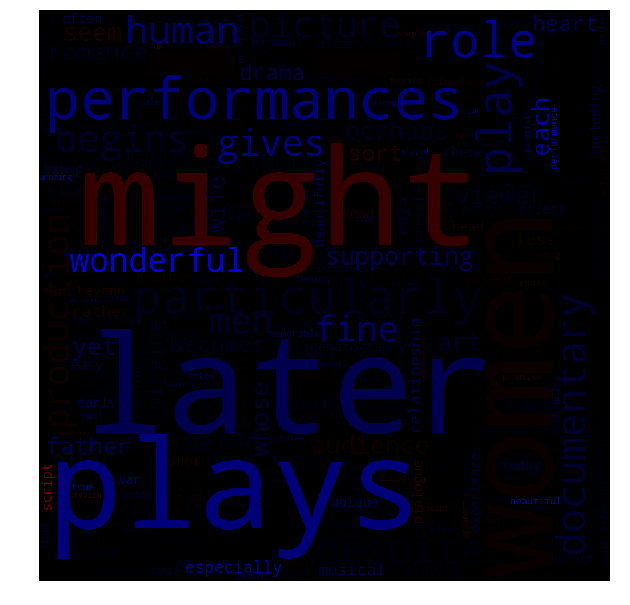

In [283]:
wc.generate_from_frequencies(deBoW(m[0], lambda x : -(x)))
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(10.5, 10.5)
axes.imshow(wc)
axes.set_axis_off()
plt.show()

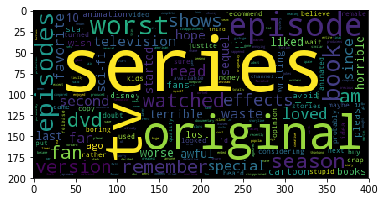

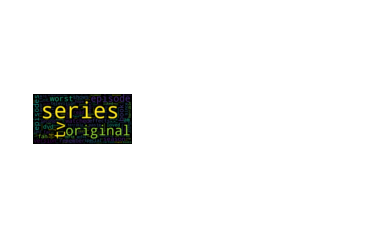

In [97]:
# image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
# axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

In [161]:
abs(-1.5)

1.5